In [ ]:
# importar bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Passo 1: entendendo o conjunto de dados**

In [ ]:
# importando dados excel
base_dados = pd.read_excel('/content/[DS] Vendas do comercial.xlsx')

In [ ]:
# 5 primeiras linhas
base_dados.head()

,dt_inicio,dt_fechamento,plano,qtd_emissores_contrato,mrr_venda,periodo_desconto(meses),desconto(%),implantacao_contrato,implantacao_desconto(%),implantacao_valor_com_desconto,implantacao_parcelas,dia_pagamento_parcelas_mrr,sdr,consultor
0,2024-04-17,2024-11-07,PlanoEmpresas,2,3120.0,0,0,Nível1,20,1683.0,1,15,AmandaOliveira,ThaynáTheodoro
1,2024-04-22,2024-10-17,PlanoI,1,3255.0,0,0,Nível1,15,3500.0,3,20,PriscilaFormaggini,EduardoFerreira
2,2024-04-25,2024-07-30,PlanoII,1,3240.0,6,44,Nível1,10,1490.0,9,5,LíviaAzevedo,ThaynáTheodoro
3,2024-05-31,2024-11-06,PlanoII,1,4290.0,0,0,Nível1,30,2100.0,1,15,AmandaOliveira,EduardoFerreira
4,2024-04-06,2024-06-13,PlanoEmpresas,1,3000.0,0,0,Nível1,20,200.0,1,5,LíviaAzevedo,EduardoFerreira


In [ ]:
# dimensão (linhas e colunas)
base_dados.shape

(119, 16)

In [ ]:
#info sobre as colunas
base_dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   dt_inicio                       116 non-null    object
 1   dt_fechamento                   110 non-null    object
 2   razao_social                    109 non-null    object
 3   cnpj                            109 non-null    object
 4   plano                           109 non-null    object
 5   qtd_emissores_contrato          109 non-null    object
 6   mrr_venda                       109 non-null    object
 7   periodo_desconto(meses)         77 non-null     object
 8   desconto(%)                     77 non-null     object
 9   implantacao_contrato            109 non-null    object
 10  implantacao_desconto(%)         62 non-null     object
 11  implantacao_valor_com_desconto  109 non-null    object
 12  implantacao_parcelas            109 non-null    ob

In [ ]:
# nome das colunas
base_dados.columns

Index(['dt_inicio', 'dt_fechamento', 'razao_social', 'cnpj', 'plano',
       'qtd_emissores_contrato', 'mrr_venda', 'periodo_desconto(meses)',
       'desconto(%)', 'implantacao_contrato', 'implantacao_desconto(%)',
       'implantacao_valor_com_desconto', 'implantacao_parcelas',
       'dia_pagamento_parcelas_mrr', 'sdr', 'consultor'],
      dtype='object')

**Passo 2: preparando os dados**

In [ ]:
# dados duplicados
base_dados.duplicated().sum()

3

In [ ]:
# apagando dados duplicados
base_dados = base_dados.drop_duplicates()

In [ ]:
# verificando exclusão de duplicatas
base_dados.duplicated().sum()

0

In [ ]:
# total de valores nulos de cada coluna
base_dados.isna().sum()

,0
dt_inicio,1
dt_fechamento,6
razao_social,7
cnpj,7
plano,7
qtd_emissores_contrato,7
mrr_venda,7
periodo_desconto(meses),39
desconto(%),39
implantacao_contrato,7


In [ ]:
# removendo linhas com todas as colunas vazias
base_dados = base_dados.dropna(how = 'all')

In [ ]:
# conservando somente as linhas com mais de 2 colunas preenchidas
base_dados = base_dados[base_dados.notna().sum(axis = 1) > 2]

In [ ]:
# filtrando as linhas onde 'razao_social' e 'consultor' são diferentes de '$'
base_dados = base_dados.loc[(base_dados['razao_social'] != '$') & (base_dados['consultor'] != '$')]

In [ ]:
# df depois de retiradas as linhas duplicadas, nulas ou com erros
base_dados.info()

<class 'pandas.core.frame.DataFrame'>
Index: 108 entries, 0 to 118
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   dt_inicio                       108 non-null    object
 1   dt_fechamento                   108 non-null    object
 2   razao_social                    108 non-null    object
 3   cnpj                            108 non-null    object
 4   plano                           108 non-null    object
 5   qtd_emissores_contrato          108 non-null    object
 6   mrr_venda                       108 non-null    object
 7   periodo_desconto(meses)         76 non-null     object
 8   desconto(%)                     76 non-null     object
 9   implantacao_contrato            108 non-null    object
 10  implantacao_desconto(%)         61 non-null     object
 11  implantacao_valor_com_desconto  108 non-null    object
 12  implantacao_parcelas            108 non-null    object


In [ ]:
# convertendo o tipo de dado de object para string

# lista de colunas a serem convertidas
colunas_string = ['sdr', 'consultor','implantacao_contrato','razao_social', 'cnpj', 'plano']

# conversão
base_dados[colunas_string] = base_dados[colunas_string].astype('string')

Agora, com o dataframe limpo, preencherei com zero as colunas que ainda permanecem vazias.

Serão elas: periodo_desconto(meses), desconto(%), implantacao_desconto(%).

Isso porque, para covertê-las para o tipo inteiro (int64), não pode haver a presença de dados nulos (NaN).

In [ ]:
# substituindo valores nulos por zero

# colunas relevantes
colunas_preenchidas = ['periodo_desconto(meses)', 'desconto(%)', 'implantacao_desconto(%)']

# substituindo
base_dados[colunas_preenchidas] = base_dados[colunas_preenchidas].fillna(0)

<ipython-input-9-2ba22ed43689>:7: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  base_dados[colunas_preenchidas] = base_dados[colunas_preenchidas].fillna(0)


In [ ]:
# convertendo o tipo de dado de object para int

# lista de colunas a serem convertidas
colunas_int = ['qtd_emissores_contrato','periodo_desconto(meses)','desconto(%)','implantacao_desconto(%)','implantacao_parcelas','dia_pagamento_parcelas_mrr']

# substituindo valores nulos com zero e depois a conversão para int
base_dados[colunas_int] = base_dados[colunas_int].astype('int64')

In [ ]:
# convertendo o tipo de dado de object para float
base_dados[['mrr_venda', 'implantacao_valor_com_desconto']] = base_dados[['mrr_venda', 'implantacao_valor_com_desconto']].astype('float64')

In [ ]:
# convertendo o tipo de dado da 'dt_inicio' para datetime (data),  o formato vai para ano-mes-dia
base_dados['dt_inicio'] = pd.to_datetime(base_dados['dt_inicio'], format ='mixed', dayfirst = False)

Ao tentar executar o código acima, darão 2 erros:
1. Erro na posição 77
2. Erro na posição 80

Foram corrigidos e depois, o código foi executado novamente e a conversão realizada.

In [ ]:
# ERRO: a posição 77 tem um dia fora do range do mês (Não tem setembro com 31 dias)
print(base_dados.iloc[77])

dt_inicio                                      9/31/2024
dt_fechamento                                 10/28/2024
razao_social                      QuantumStreamSolutions
cnpj                                      18815201856968
plano                                            PlanoII
qtd_emissores_contrato                                 1
mrr_venda                                         1055.0
periodo_desconto(meses)                                0
desconto(%)                                            0
implantacao_contrato               ConfiguracoesIniciais
implantacao_desconto(%)                                0
implantacao_valor_com_desconto                    1000.0
implantacao_parcelas                                   1
dia_pagamento_parcelas_mrr                             5
sdr                                       AmandaOliveira
consultor                                EduardoFerreira
Name: 88, dtype: object


Pelas muitas manipulações anteriores, o index estava desalinhado e, por isso, usei o reset_index. Para redefinir o índice do dataframe.  

In [ ]:
# reconstruindo o index novamente
base_dados.reset_index(drop = True, inplace = True)

In [ ]:
# corrigindo manualmente da data da posição 77 da coluna 'dt_inicio'
base_dados.loc[77, 'dt_inicio'] = '09/30/2024'

In [ ]:
# verificação da substituição
print(base_dados.iloc[77])

dt_inicio                                     09/30/2024
dt_fechamento                                 10/28/2024
razao_social                      QuantumStreamSolutions
cnpj                                      18815201856968
plano                                            PlanoII
qtd_emissores_contrato                                 1
mrr_venda                                         1055.0
periodo_desconto(meses)                                0
desconto(%)                                            0
implantacao_contrato               ConfiguracoesIniciais
implantacao_desconto(%)                                0
implantacao_valor_com_desconto                    1000.0
implantacao_parcelas                                   1
dia_pagamento_parcelas_mrr                             5
sdr                                       AmandaOliveira
consultor                                EduardoFerreira
Name: 77, dtype: object


In [ ]:
# ERRO: data malformada no formato (m/d/a) na posição 80
print(base_dados.iloc[80])

dt_inicio                                     10/4/2024
dt_fechamento                                 11/1/2024
razao_social                            RadiantLinkLtda
cnpj                                     16247205043313
plano                                     PlanoServicos
qtd_emissores_contrato                                1
mrr_venda                                         230.0
periodo_desconto(meses)                               0
desconto(%)                                           0
implantacao_contrato              ConfiguracoesIniciais
implantacao_desconto(%)                               0
implantacao_valor_com_desconto                    450.0
implantacao_parcelas                                  6
dia_pagamento_parcelas_mrr                            5
sdr                                      AmandaOliveira
consultor                                ThaynáTheodoro
Name: 80, dtype: object


In [ ]:
# corrigindo manualmente da data da posição 80 da coluna 'dt_inicio'
base_dados.loc[80, 'dt_inicio'] = '10/4/2024'

In [ ]:
base_dados.iloc[80]

,80
dt_inicio,10/4/2024
dt_fechamento,11/1/2024
razao_social,RadiantLinkLtda
cnpj,16247205043313
plano,PlanoServicos
qtd_emissores_contrato,1
mrr_venda,230.0
periodo_desconto(meses),0
desconto(%),0
implantacao_contrato,ConfiguracoesIniciais


In [ ]:
# convertendo o tipo de dado de object para datetime (data), o formato vai para ano-mes-dia
base_dados['dt_fechamento'] = pd.to_datetime(base_dados['dt_fechamento'], format ='mixed', dayfirst = False)

In [ ]:
# convertendo formato das datas de %m/%d/%Y para %d/%m/%Y,  não usarei esse código
# pq o formato volta para string e assim, não conseguirei realizar cálculos com as datas

# base_dados['dt_inicio'] = base_dados['dt_inicio'].dt.strftime('%d/%m/%Y')
# base_dados['dt_fechamento'] = base_dados['dt_fechamento'].dt.strftime('%d/%m/%Y')

In [ ]:
# confirmando a conversão de todas as colunas
base_dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   dt_inicio                       108 non-null    datetime64[ns]
 1   dt_fechamento                   108 non-null    datetime64[ns]
 2   razao_social                    108 non-null    string        
 3   cnpj                            108 non-null    string        
 4   plano                           108 non-null    string        
 5   qtd_emissores_contrato          108 non-null    int64         
 6   mrr_venda                       108 non-null    float64       
 7   periodo_desconto(meses)         108 non-null    int64         
 8   desconto(%)                     108 non-null    int64         
 9   implantacao_contrato            108 non-null    string        
 10  implantacao_desconto(%)         108 non-null    int64         
 11  implan

**Passo 3: Perguntas obrigatórias**

**1. Quantidade de Vendas: Número total de vendas realizadas**

In [ ]:
# contando a quantidade de linhas
qtd_vendas_totais = len(base_dados)

print(f'O número total de vendas foi:{qtd_vendas_totais}')

O número total de vendas foi:108


**2. Quantidade de Emissores: Número total de emissores das vendas.**

In [ ]:
# somando todos os valores da coluna 'qtd_emissores_contrato'
qtd_emissores_total = base_dados['qtd_emissores_contrato'].sum()

print(f'O número total de emissores foi: {qtd_emissores_total}')

O número total de emissores foi: 127


**3. Soma do MRR sem Desconto: Total do MRR das vendas antes da
aplicação de descontos.**


In [ ]:
# somando todos os valores da coluna 'mrr_venda'
soma_mrr_sem_desconto = base_dados['mrr_venda'].sum()

print(f'A soma total do MRR sem desconto é:{soma_mrr_sem_desconto}')

A soma total do MRR sem desconto é:241533.0


**4. Soma do MRR com Desconto: Total do MRR das vendas após a
aplicação de descontos (lembre-se de considerar o período do
desconto)**

In [ ]:
# calcular MRR com desconto
mrr_com_desconto = base_dados['mrr_venda'] * (1 - base_dados['desconto(%)'] / 100)

In [ ]:
# calculando o MRR considerando o período do desconto

# mrr com desconto * meses com desconto
mrr_desc_mes_desc = mrr_com_desconto * base_dados['periodo_desconto(meses)']

# mrr sem desconto * meses sem desconto
mrr_sdesc_mes_sdesc = base_dados['mrr_venda'] * (12 - base_dados['periodo_desconto(meses)'])

# calculando o mrr ponderado
base_dados['mrr_desc_ponderado'] = (mrr_desc_mes_desc + mrr_sdesc_mes_sdesc) / 12

In [ ]:
# soma total do MRR com desconto considerando o periodo do desconto
soma_mrr_desc = base_dados['mrr_desc_ponderado'].sum().round(2)

print(f'A soma do MRR com desconto é: {soma_mrr_desc}')

A soma do MRR com desconto é: 192601.61


**5. Ticket Médio do MRR sem Desconto: Média do MRR sem
descontos.**


In [ ]:
# calculando a média do mrr sem desconto (coluna 'mrr_venda')
media_mrr_sdesc = base_dados['mrr_venda'].mean().round(2)

print(f'O ticket médio do MRR sem desconto é:{media_mrr_sdesc}')

O ticket médio do MRR sem desconto é:2236.42


**6. Ticket Médio do MRR com Desconto: Média do MRR com
descontos.**


In [ ]:
# calculando a média do mrr com desconto (coluna 'mrr_desc_ponderado')
media_mrr_desc = base_dados['mrr_desc_ponderado'].mean().round(2)

print(f'O ticket médio do MRR com desconto é:{media_mrr_desc}')

O ticket médio do MRR com desconto é:1783.35


**7. Soma da Receita de Implantação (com Desconto): Total
arrecadado com os valores de implantação das vendas, considerando
os descontos aplicados.**


In [ ]:
# calculando a soma total da coluna 'implantacao_valor_com_desconto'
soma_implantacao_valor_com_desconto = base_dados['implantacao_valor_com_desconto'].sum()

print(f'A soma da receita de implantação com os descontos foi: {soma_implantacao_valor_com_desconto}')

A soma da receita de implantação com os descontos foi: 213600.5


**8. Ticket Médio da Implantação: Média do valor de implantação (com
descontos) por venda.**

In [ ]:
# calculando a média da coluna 'implantacao_valor_com_desconto'
media_implantacao_valor_com_desconto = base_dados['implantacao_valor_com_desconto'].mean().round(2)

print(f'O ticket médio de implantação com o descontos é: {media_implantacao_valor_com_desconto}')

O ticket médio de implantação com o descontos é: 1977.78


**9. ARR com Desconto: Receita recorrente anual considerando o
desconto aplicado.**


In [ ]:
# calcular o arr com desconto = mrr(com desconto) * 12
base_dados['arr_com_desconto'] = base_dados['mrr_desc_ponderado'] * 12

In [ ]:
# soma total do arr com desconto
soma_arr_desc = base_dados['arr_com_desconto'].sum().round(2)

print(f'A soma da ARR foi com desconto: {soma_arr_desc}')

A soma da ARR foi com desconto: 2311219.35


**10. ARR sem Desconto: Receita recorrente anual sem considerar os
descontos.**


In [ ]:
# calcular o arr sem desconto = mrr(sem desconto) * 12
base_dados['arr_sdesc']= base_dados['mrr_venda'] * 12

In [ ]:
# soma total do arr sem desconto
soma_arr_sdesc = base_dados['arr_sdesc'].sum().round(2)

print(f'A soma da ARR foi sem desconto foi: {soma_arr_sdesc}')

A soma da ARR foi sem desconto foi: 2898396.0


**11. Tempo Médio para Fechamento da Venda: Média de tempo (em
dias) que cada venda levou para ser concluída.**


In [ ]:
# dt_fechamento - dt_inicio
base_dados['dias_para_fechamento_venda'] = (base_dados['dt_fechamento'] - base_dados['dt_inicio']).dt.days

In [ ]:
# calculando a média de dias
media_para_fechamento_venda = base_dados['dias_para_fechamento_venda'].mean().round(2)

print(f'A média de dias para o fechamento da venda foi: {media_para_fechamento_venda}')

A média de dias para o fechamento da venda foi: 46.56


**Passo 4: Hipóteses extras**

**0. Uma procura rápida por correlações importantes**

In [ ]:
# criar df com colunas numericas, exclusivamente
colunas_num = base_dados.select_dtypes(include = ['int64', 'float64'])

In [ ]:
colunas_num.columns

Index(['qtd_emissores_contrato', 'mrr_venda', 'periodo_desconto(meses)',
       'desconto(%)', 'implantacao_desconto(%)',
       'implantacao_valor_com_desconto', 'implantacao_parcelas',
       'dia_pagamento_parcelas_mrr', 'mrr_desc_ponderado', 'arr_com_desconto',
       'dias_para_fechamento_venda', 'arr_sdesc'],
      dtype='object')

In [ ]:
# lista de colunas numericas irrelevantes
colunas_irrelevantes = ['mrr_desc_ponderado', 'arr_com_desconto', 'arr_sdesc']

# apagando colunas desnecessarias
colunas_num = colunas_num.drop(columns = colunas_irrelevantes )

In [ ]:
colunas_num['dias_para_fechamento_venda'] = base_dados['dias_para_fechamento_venda']

<Axes: >

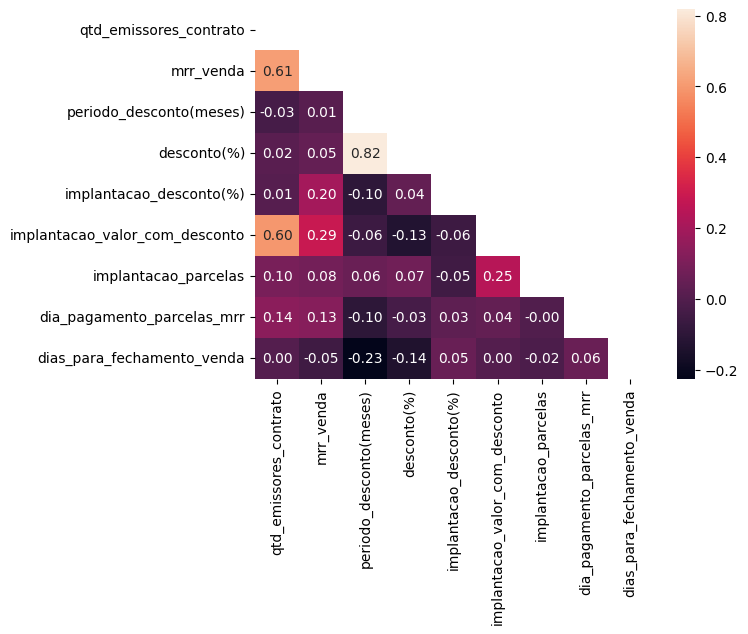

In [ ]:
# matriz de correlação
correlacao = colunas_num.corr()

# mascara superior do heatmap
mascara = np.triu(np.ones_like(correlacao, dtype = bool))

# plotando o heatmap
sns.heatmap(correlacao, mask = mascara, annot = True, fmt = '.2f')

Text(0, 0.5, 'Qtd de Emissores (por contrato)')

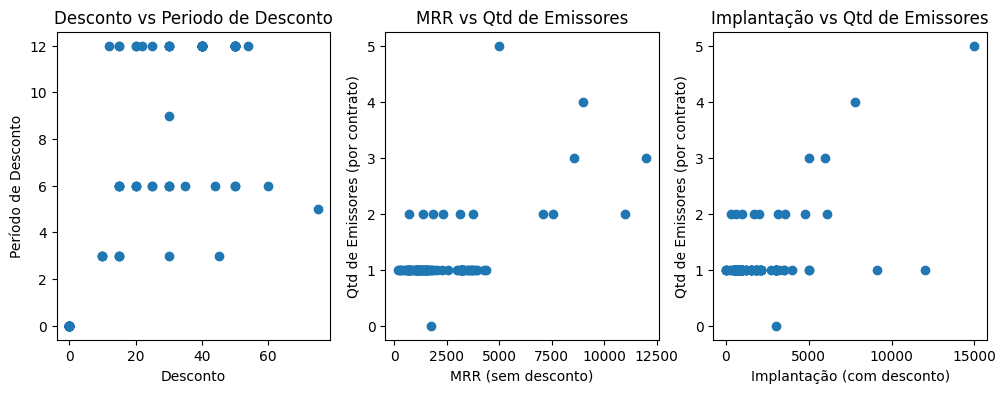

In [ ]:
# grafico de dispersão com valores no heatmap >= 0.6

# criar 3 graficos de uma vez
fig, axs = plt.subplots(1,3, figsize = (12,4))

# grafico 1
axs[0].scatter(colunas_num['desconto(%)'], colunas_num['periodo_desconto(meses)'])
axs[0].set_title('Desconto vs Periodo de Desconto')
axs[0].set_xlabel('Desconto')
axs[0].set_ylabel('Período de Desconto')

# grafico 2
axs[1].scatter(colunas_num['mrr_venda'],colunas_num['qtd_emissores_contrato'])
axs[1].set_title('MRR vs Qtd de Emissores')
axs[1].set_xlabel('MRR (sem desconto)')
axs[1].set_ylabel('Qtd de Emissores (por contrato)')

# grafico 3
axs[2].scatter(colunas_num['implantacao_valor_com_desconto'],colunas_num['qtd_emissores_contrato'])
axs[2].set_title('Implantação vs Qtd de Emissores')
axs[2].set_xlabel('Implantação (com desconto)')
axs[2].set_ylabel('Qtd de Emissores (por contrato)')


No mapa de calor, sinalizou-se uma forte correlação positiva entre os descontos e o período de descontos.
Isso significa que quanto maior o desconto, maior também o período de desconto, com fator de correlção de 0,82.

**1. Empresas com maiores descontos fecham contratos mais rapidamente.**

In [ ]:
# calculando correlação entre desconto e dias necessarios para realização da venda
correlacao2 = colunas_num['dias_para_fechamento_venda'].corr(colunas_num['desconto(%)'])

print(correlacao2)

-0.13862421204212882


Partindo do grau de correlação, não há relação alguma entre desconto e dias para fechamento de venda.

**2. Ticket médio por consultor**

In [ ]:
# calcunado o ticket total liquido, ou seja, já com os descontos
base_dados['ticket_total'] = base_dados['mrr_desc_ponderado'] + base_dados['implantacao_valor_com_desconto']

In [ ]:
# calculando o ticket médio de mrr com desconto por consultor

ticket_medio_consultor = base_dados.groupby('consultor')['ticket_total'].mean()

ticket_medio_consultor

,ticket_total
consultor,
EduardoFerreira,3873.246065
ThaynáTheodoro,3649.015278


**3. Qual plano apresenta maior MRR e como isso impacta o tempo de fechamento e descontos?**

In [ ]:
base_dados.groupby('plano')[['desconto(%)', 'dias_para_fechamento_venda', 'ticket_total',]].mean().round(2).sort_values(by = 'ticket_total', ascending = False)

,desconto(%),dias_para_fechamento_venda,ticket_total
plano,,,
PlanoIII,11.00,18.50,9535.55
PlanoEmpresas,17.00,126.50,4993.81
PlanoServicos,20.12,45.59,4249.92
PlanoII,30.67,32.67,3548.08
PlanoI,19.77,49.55,2850.16


O plano 3 é o plano vendido mais rapidamente. Ele possui o menor desconto (11% em média) e o maior ticket médio (9.535,55).

Já o plano 2, possui a maior média de desconto (30,67%) e o segundo menor ticket médio (3548,08), ficando atrás somente do plano 1 com ticket de 2.850,16.

Já o plano que demanda maior tempo para realizar a venda é o PlanoEmpresas, necessitando, em torno de, 79 dias.

In [ ]:
base_dados.groupby('plano')[['dias_para_fechamento_venda', 'mrr_venda', 'implantacao_desconto(%)', 'ticket_total']].mean().round(2).sort_values(by = 'mrr_venda', ascending = False)

,dias_para_fechamento_venda,mrr_venda,implantacao_desconto(%),ticket_total
plano,,,,
PlanoIII,18.50,6445.00,0.00,9535.55
PlanoII,32.67,2335.13,16.14,3548.08
PlanoServicos,45.59,2077.65,12.94,4249.92
PlanoI,56.59,1911.39,12.05,2850.16
PlanoEmpresas,79.20,1817.00,10.00,4993.81


Aqui, nota-se uma relação inversamente proporcional entre os dias médio necessarios para conclusão das vendas e a mrr média da venda, isso divido por planos.
Veja que quanto maior o tempo necessario para o fechamento da venda do plano, menor o mrr da venda.

Com exceção do plano 3 que não houve casos de implantação com desconto, nos demias planos é perceptível uma relação entre desconto na implantação e dias para concretização da venda. Quanto menor o desconto de implantação, maior o tempo de negociação.

In [ ]:
base_dados.groupby('sdr')[['mrr_venda', 'dias_para_fechamento_venda' , 'periodo_desconto(meses)','desconto(%)', 'ticket_total']].mean().round(2).sort_values(by = 'mrr_venda' ,ascending = False)

,mrr_venda,dias_para_fechamento_venda,periodo_desconto(meses),desconto(%),ticket_total
sdr,,,,,
LíviaAzevedo,2395.57,36.37,7.80,28.29,3725.29
PriscilaFormaggini,2306.53,48.92,6.14,22.69,4008.84
AmandaOliveira,2017.65,45.32,6.32,24.59,3554.02


In [ ]:
base_dados.groupby('sdr')[['sdr']].value_counts()

,count
sdr,
AmandaOliveira,37
LíviaAzevedo,35
PriscilaFormaggini,36


In [ ]:
base_dados.groupby('plano')['plano'].value_counts().sort_values(ascending = False)

,count
plano,
PlanoII,57
PlanoI,22
PlanoServicos,17
PlanoEmpresas,10
PlanoIII,2


**BI: GRAFICO DE PIZZA DOS PLANOS**

Entre os sdr, da para notar que os descontos influenciam no tempo necessario para conclusão da venda.

In [ ]:
base_dados.columns

Index(['dt_inicio', 'dt_fechamento', 'razao_social', 'cnpj', 'plano',
       'qtd_emissores_contrato', 'mrr_venda', 'periodo_desconto(meses)',
       'desconto(%)', 'implantacao_contrato', 'implantacao_desconto(%)',
       'implantacao_valor_com_desconto', 'implantacao_parcelas',
       'dia_pagamento_parcelas_mrr', 'sdr', 'consultor', 'mrr_desc_ponderado',
       'arr_com_desconto', 'dias_para_fechamento_venda', 'ticket_total'],
      dtype='object')

In [ ]:
# implantação valor sem desc

base_dados['implantacao_valor_sem_desconto'] = (
  base_dados['implantacao_valor_com_desconto'] / (1 - base_dados['implantacao_desconto(%)'] / 100)
)

In [ ]:
# vendas por mês

# coluna com o mês de cada venda
base_dados['mes_venda'] = base_dados['dt_inicio'].dt.month

# contando numero de vendas por mes por ondem de mês
vendas_por_mes = base_dados['mes_venda'].value_counts().sort_index()

vendas_por_mes


,count
mes_venda,
2,2
4,5
5,5
6,17
7,12
8,22
9,7
10,18
11,14


In [ ]:
#
base_dados.groupby('mes_venda')[['ticket_total', 'mrr_venda']].mean().sort_values(by = ['ticket_total'],ascending = True)

,ticket_total,mrr_venda
mes_venda,,
2,1380.000000,765.000000
9,2211.160714,1069.285714
11,2598.875000,1072.857143
10,3132.850694,1174.166667
5,3422.775000,1986.000000
8,3706.606250,2328.068182
4,4154.040000,2664.000000
12,4298.458333,2102.500000
7,4631.029167,3749.166667


Em fevereiro, obtivemos os menores tickets liquidos (mrr + implantação) com 1380, em média, enquanto em junho, o maior com 5552.